In [2]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.extra.rate_limiter import RateLimiter

In [3]:
df = pd.read_csv('Race_data.csv')

In [4]:
df = df.dropna(axis=1)

In [6]:
df.head()

,Place,First,Last,City,State,Age,Division,Time
0,1,Daniel,Wilson,Tulsa,OK,35,M,8:23:01
1,2,Eric,Davis,Greenwood,IN,38,M,8:57:54
2,3,Stewart,Edwards,New Smyrna Beach,FL,43,M,9:24:35
3,4,Ron,Hammett,Montverde,FL,53,M,9:24:36
4,5,Seth,Cain,Geneva,FL,44,M,9:42:17


In [8]:
df.shape

(108, 8)

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
103    False
104    False
105    False
106    False
107    False
Length: 108, dtype: bool

In [11]:
df.isnull().sum()/df.shape[0]*100

Place       0.0
First       0.0
Last        0.0
City        0.0
State       0.0
Age         0.0
Division    0.0
Time        0.0
dtype: float64

In [12]:
df['Fullname'] = df['First']  + ' ' + df['Last']

In [13]:
df.head()

,Place,First,Last,City,State,Age,Division,Time,Fullname
0,1,Daniel,Wilson,Tulsa,OK,35,M,8:23:01,Daniel Wilson
1,2,Eric,Davis,Greenwood,IN,38,M,8:57:54,Eric Davis
2,3,Stewart,Edwards,New Smyrna Beach,FL,43,M,9:24:35,Stewart Edwards
3,4,Ron,Hammett,Montverde,FL,53,M,9:24:36,Ron Hammett
4,5,Seth,Cain,Geneva,FL,44,M,9:42:17,Seth Cain


In [15]:
df['Time'] = pd.to_timedelta(df['Time'])

In [18]:
df['Total_Minutes'] = df['Time'].dt.total_seconds() / 60
df['Total_Minutes'] = df['Total_Minutes'].round().astype(int)

In [19]:
df.rename(columns={'Division':'Gender'}, inplace=True)

In [20]:
def get_lat_long(city, state):
    address = f"{city}, {state}"
    try:
        geolocator = Nominatim(user_agent="running", timeout=10)
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

In [23]:
df['latitude'], df['longitude'] = zip(*df.apply(lambda x: get_lat_long(x['City'], x['State']), axis=1))

In [24]:
df['latlong'] = df['latitude'].astype(str) + ' , ' + df['longitude'].astype(str)

In [25]:
df.head()

,Place,First,Last,City,State,Age,Gender,Time,Fullname,Total_Minutes,latitude,longitude,latlong
0,1,Daniel,Wilson,Tulsa,OK,35,M,0 days 08:23:01,Daniel Wilson,503,36.156312,-95.992752,"36.1563122 , -95.9927516"
1,2,Eric,Davis,Greenwood,IN,38,M,0 days 08:57:54,Eric Davis,538,39.613699,-86.109543,"39.6136987 , -86.1095429"
2,3,Stewart,Edwards,New Smyrna Beach,FL,43,M,0 days 09:24:35,Stewart Edwards,565,29.025813,-80.927127,"29.0258132 , -80.9271271"
3,4,Ron,Hammett,Montverde,FL,53,M,0 days 09:24:36,Ron Hammett,565,28.600277,-81.673964,"28.6002769 , -81.673964"
4,5,Seth,Cain,Geneva,FL,44,M,0 days 09:42:17,Seth Cain,582,28.739716,-81.115062,"28.7397163 , -81.1150616"


In [26]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
corelation = df.corr(numeric_only =True)

<Axes: >

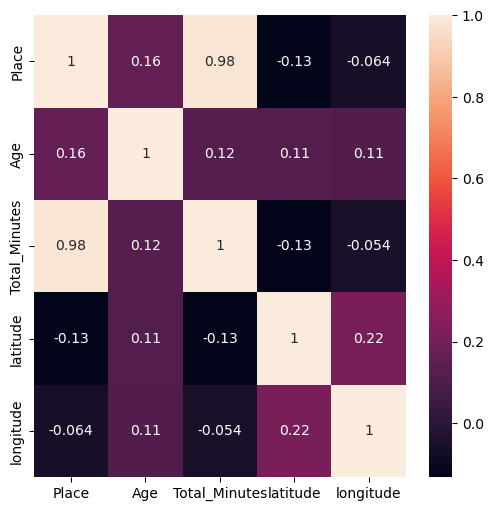

In [33]:
plt.figure(figsize=(6,6))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

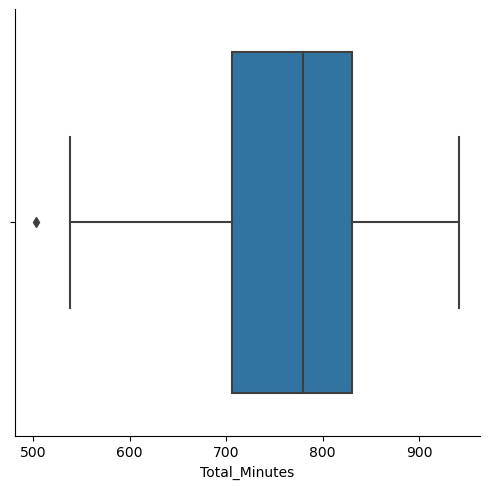

In [35]:
sns.catplot(x='Total_Minutes', kind='box', data=df)

<Axes: xlabel='Total_Minutes', ylabel='Count'>

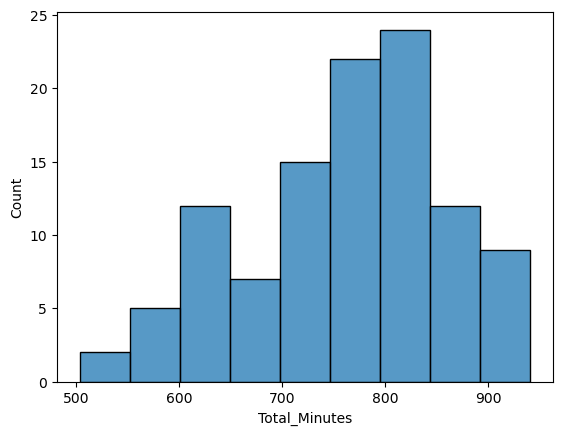

In [44]:
sns.histplot(df['Total_Minutes'])

In [45]:
df.to_csv('Cleaned_Race_data.csv')